In [478]:
%reload_ext autoreload

In [479]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [528]:
#!pip install tqdm

from tqdm import tqdm
from pandas import Timestamp
import pandas as pd
import sys
from datetime import date, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from statistics import mean 
sys.path.append('../lib')
import utils
import preprocessing


In [545]:
# Load in data

PATH = "../data/"
df = pd.read_csv(f'{PATH}cases.csv', low_memory=False, encoding='latin1')

df.rename(columns={'Age (Hours)': 'case_hours', 'Case Origin': 'origin', 'Directory ID': 'n_number', 'Open': 'open', 'Closed': 'closed'}, inplace=True)

In [546]:
PATH = "../data/"
df_ml = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [568]:
unique_live_merchants = df_ml.loc[df_ml.canceldate.isnull()].username.unique()
unique_churned_merchants = df_ml.loc[df_ml.canceldate.notnull()].username.unique()
unique_live_merchants, len(unique_live_merchants)


(array(['1808thestore', '4sme', 'aadl', ..., 'newaim', 'nicholas262411061112', 'nictimecodest23'],
       dtype=object), 3277)

In [548]:
df.shape

(164800, 6)

In [549]:
df = df.loc[df.n_number.isin(unique_live_merchants)]

In [550]:
df.shape

(103214, 6)

In [551]:
#df['date'] = df['Date/Time Opened'].str.split(" ", expand = True)[0]
df['date'] = pd.to_datetime(df['Date/Time Opened'], format='%d/%m/%Y %I:%M %p')
df = df.drop(columns=['Date/Time Opened'])
df['date'] = df['date'].dt.date

In [552]:
df.shape

(103214, 6)

In [553]:
# 50th Percentile
def p50(x):
    return x.quantile(0.5)

# 90th Percentile
def p90(x):
    return x.quantile(0.9)

In [554]:
week_ago = date.today() - timedelta(days=7)
month_ago = date.today() - timedelta(days=30)
quarter_ago = date.today() - timedelta(days=90)
print(week_ago, month_ago, quarter_ago)

unique_numbers = pd.DataFrame(data={'n_number': unique_ml})
unique_numbers, len(unique_numbers)

2019-11-28 2019-11-05 2019-09-06


(                  n_number
 0             1808thestore
 1                     4sme
 2                     aadl
 3                 Abdomend
 4         absmanufacturing
 ...                    ...
 3272           netosupport
 3273       NetworkConnecto
 3274                newaim
 3275  nicholas262411061112
 3276       nictimecodest23
 
 [3277 rows x 1 columns], 3277)

In [557]:
def my_progress(func):
    def wrapper():
        tqdm(func(), total=len(test))
    return wrapper

weekly = df.loc[df.date > week_ago].groupby(['n_number']).agg(['sum', 'mean', 'median', p90])
weekly.reset_index(inplace=True)
weekly.columns = ['n_number', 'case_hours_sum_week', 'case_hours_mean_week','case_hours_median_week', 'case_hours_p90_week',
                'open_sum_week', 'open_mean_week', 'open_median_week', 'open_p90_week',
                'closed_sum_week', 'closed_mean_week', 'closed_median_week', 'close_p90_week'
               ]
weekly

n_number  case_hours_sum_week  case_hours_mean_week  \
0    L005860                 47.0             15.666667   
1    L006544                 37.0              9.250000   
2    L007273                 61.0             30.500000   
3    N001008                  0.0              0.000000   
4    N001022                  0.0              0.000000   
..       ...                  ...                   ...   
177  N065267                 35.0             35.000000   
178  N065350                  0.0              0.000000   
179  N065499                  0.0              0.000000   
180  N065928                 64.0             64.000000   
181  N066712                 63.0             63.000000   

     case_hours_median_week  case_hours_p90_week  open_sum_week  \
0                       2.0                 36.4              1   
1                       9.5                 17.7              3   
2                      30.5                 42.9              2   
3                       0.0                  0.0              0   
4                       0.0                  0.0              0   
..                      ...                  ...            ...   
177                    35.0                 35.0              1   
178                     0.0                  0.0              0   
179                     0.0                  0.0              0   
180                    64.0                 64.0              1   
181                    63.0                 63.0              1   

     open_mean_week  open_median_week  open_p90_week  closed_sum_week  \
0          0.333333               0.0            0.8                2   
1          0.750000               1.0            1.0                1   
2          1.000000               1.0            1.0                0   
3          0.000000               0.0            0.0                1   
4          0.000000               0.0            0.0                1   
..              ...               ...            ...              ...   
177        1.000000               1.0            1.0                0   
178        0.000000               0.0            0.0                2   
179        0.000000               0.0            0.0                1   
180        1.000000               1.0            1.0                0   
181        1.000000               1.0            1.0                0   

     closed_mean_week  closed_median_week  close_p90_week  
0            0.666667                 1.0             1.0  
1            0.250000                 0.0             0.7  
2            0.000000                 0.0             0.0  
3            1.000000                 1.0             1.0  
4            1.000000                 1.0             1.0  
..                ...                 ...             ...  
177          0.000000                 0.0             0.0  
178          1.000000                 1.0             1.0  
179          1.000000                 1.0             1.0  
180          0.000000                 0.0             0.0  
181          0.000000                 0.0             0.0  

[182 rows x 13 columns]

In [566]:
monthly = df.loc[df.date > month_ago].groupby(['n_number']).agg(['sum', 'mean', 'median', p90])
monthly.reset_index(inplace=True)
monthly.columns = ['n_number', 'case_hours_sum_month', 'case_hours_mean_month','case_hours_median_month', 'case_hours_p90_month',
                'open_sum_month', 'open_mean_month', 'open_median_month', 'open_p90_month',
                'closed_sum_month', 'closed_mean_month', 'closed_median_month', 'close_p90_month'
               ]

quarterly = df.loc[df.date > quarter_ago].groupby(['n_number']).agg(['sum', 'mean', 'median', p90])
quarterly.reset_index(inplace=True)
quarterly.columns = ['n_number', 'case_hours_sum_quarter', 'case_hours_mean_quarter','case_hours_median_quarter', 'case_hours_p90_quarter',
                'open_sum_quarter', 'open_mean_quarter', 'open_median_quarter', 'open_p90_quarter',
                'closed_sum_quarter', 'closed_mean_quarter', 'closed_median_quarter', 'close_p90_quarter'
               ]

temp = pd.merge(unique_numbers, weekly, on='n_number', how='left')
temp2 = pd.merge(temp, monthly, on='n_number', how='left')
live_merchants = pd.merge(temp2, quarterly, on='n_number', how='left')


In [567]:
live_merchants.tail(30)

n_number  case_hours_sum_week  case_hours_mean_week  \
3247               N066266                  NaN                   NaN   
3248               N066304                  NaN                   NaN   
3249               N066313                  NaN                   NaN   
3250               N066333                  NaN                   NaN   
3251               N066345                  NaN                   NaN   
3252               N066381                  NaN                   NaN   
3253               N066426                  NaN                   NaN   
3254               N066428                  NaN                   NaN   
3255               N066429                  NaN                   NaN   
3256               N066454                  NaN                   NaN   
3257               N066457                  NaN                   NaN   
3258               N066461                  NaN                   NaN   
3259               N066479                  NaN                   NaN   
3260               N066500                  NaN                   NaN   
3261               N066543                  NaN                   NaN   
3262               N066560                  NaN                   NaN   
3263               N066573                  NaN                   NaN   
3264               N066691                  NaN                   NaN   
3265               N066712                 63.0                  63.0   
3266               N066744                  NaN                   NaN   
3267               N066775                  NaN                   NaN   
3268               N066778                  NaN                   NaN   
3269               N066815                  NaN                   NaN   
3270              nakeddev                  NaN                   NaN   
3271       naturalpets-Un7                  NaN                   NaN   
3272           netosupport                  NaN                   NaN   
3273       NetworkConnecto                  NaN                   NaN   
3274                newaim                  NaN                   NaN   
3275  nicholas262411061112                  NaN                   NaN   
3276       nictimecodest23                  NaN                   NaN   

      case_hours_median_week  case_hours_p90_week  open_sum_week  \
3247                     NaN                  NaN            NaN   
3248                     NaN                  NaN            NaN   
3249                     NaN                  NaN            NaN   
3250                     NaN                  NaN            NaN   
3251                     NaN                  NaN            NaN   
3252                     NaN                  NaN            NaN   
3253                     NaN                  NaN            NaN   
3254                     NaN                  NaN            NaN   
3255                     NaN                  NaN            NaN   
3256                     NaN                  NaN            NaN   
3257                     NaN                  NaN            NaN   
3258                     NaN                  NaN            NaN   
3259                     NaN                  NaN            NaN   
3260                     NaN                  NaN            NaN   
3261                     NaN                  NaN            NaN   
3262                     NaN                  NaN            NaN   
3263                     NaN                  NaN            NaN   
3264                     NaN                  NaN            NaN   
3265                    63.0                 63.0            1.0   
3266                     NaN                  NaN            NaN   
3267                     NaN                  NaN            NaN   
3268                     NaN                  NaN            NaN   
3269                     NaN                  NaN            NaN   
3270                     NaN                  NaN            NaN   
3271                     NaN                  NaN     

In [574]:
test = df_ml.loc[df_ml.canceldate.notnull(), ['username', 'canceldate']]
test

username canceldate
0          12vFridges 2016-06-07
3           55parrots 2018-01-29
4     5thelementexped 2017-11-20
5        8ballrampage 2016-04-29
9                  ac 2015-08-27
...               ...        ...
6451          N066139 2019-10-04
6487          natstar 2015-12-08
6492  NewtonFurniture 2016-09-12
6494  nicknimbleneta6 2016-09-08
6496  nomadsportfishi 2017-11-07

[3220 rows x 2 columns]

In [577]:
quarterly = df.loc[df.date > quarter_ago].groupby(['n_number']).agg(['sum', 'mean', 'median', p90])
quarterly.reset_index(inplace=True)

test.apply(lambda n: print(n.canceldate), axis=1)

for idx, row in tqdm(test.iterrows(), total=len(test)):
    pass
    #print(idx, row)
    #filter by row.username
    #agg new df
    #return small dataframe and add to list

#pd.concat dataframes

2016-06-07 00:00:00
2018-01-29 00:00:00
2017-11-20 00:00:00
2016-04-29 00:00:00
2015-08-27 00:00:00
2013-10-31 00:00:00
2017-10-03 00:00:00
2017-12-15 00:00:00
2015-04-30 00:00:00
2017-01-03 00:00:00
2015-07-29 00:00:00
2015-11-05 00:00:00
2016-01-29 00:00:00
2017-12-22 00:00:00
2015-08-17 00:00:00
2016-10-24 00:00:00
2016-09-02 00:00:00
2018-03-01 00:00:00
2013-06-03 00:00:00
2015-12-22 00:00:00
2014-10-08 00:00:00
2017-02-21 00:00:00
2016-03-15 00:00:00
2015-11-09 00:00:00
2016-07-13 00:00:00
2018-01-10 00:00:00
2017-06-27 00:00:00
2017-10-12 00:00:00
2015-08-17 00:00:00
2015-05-08 00:00:00
2017-08-18 00:00:00
2016-05-26 00:00:00
2017-02-01 00:00:00
2018-01-29 00:00:00
2015-03-09 00:00:00
2016-06-30 00:00:00
2015-02-16 00:00:00
2016-07-29 00:00:00
2017-03-06 00:00:00
2017-02-09 00:00:00
2015-08-19 00:00:00
2015-09-28 00:00:00
2017-06-06 00:00:00
2017-09-18 00:00:00
2016-08-24 00:00:00
2015-07-29 00:00:00
2017-06-08 00:00:00
2015-11-24 00:00:00
2015-10-19 00:00:00
2015-06-03 00:00:00


  0%|          | 0/3220 [00:00<?, ?it/s]


2017-03-17 00:00:00
2018-07-19 00:00:00
2019-07-29 00:00:00
2016-12-29 00:00:00
2018-06-29 00:00:00
2018-09-13 00:00:00
2017-01-09 00:00:00
2017-07-24 00:00:00
2017-01-30 00:00:00
2018-09-14 00:00:00
2017-02-17 00:00:00
2017-05-11 00:00:00
2017-04-10 00:00:00
2017-03-02 00:00:00
2017-02-21 00:00:00
2017-01-11 00:00:00
2019-09-30 00:00:00
2018-01-29 00:00:00
2019-03-11 00:00:00
2017-09-11 00:00:00
2019-02-15 00:00:00
2017-03-01 00:00:00
2018-01-29 00:00:00
2016-12-19 00:00:00
2018-10-26 00:00:00
2017-08-03 00:00:00
2017-11-30 00:00:00
2019-03-19 00:00:00
2017-09-01 00:00:00
2018-04-03 00:00:00
2017-01-06 00:00:00
2017-01-05 00:00:00
2017-08-07 00:00:00
2017-06-01 00:00:00
2017-05-08 00:00:00
2018-05-31 00:00:00
2017-01-11 00:00:00
2017-05-11 00:00:00
2017-02-10 00:00:00
2017-08-08 00:00:00
2018-03-21 00:00:00
2017-02-28 00:00:00
2017-05-09 00:00:00
2018-01-09 00:00:00
2018-05-25 00:00:00
2018-08-10 00:00:00
2019-06-10 00:00:00
2017-09-12 00:00:00
2017-09-11 00:00:00
2017-07-26 00:00:00

100%|██████████| 3220/3220 [00:00<00:00, 7255.95it/s]


In [190]:
#test.unstack(level=0).sort_index().head(1)
test.sort_index(axis=0).head(10)

case_hours  open  closed
n_number date                                
L003305  2019-11-24       165.0   0.0     1.0
         2019-12-08       122.0   1.0     1.0
L003415  2019-11-24       176.0   0.0     3.0
L003836  2019-11-24       253.0   1.0     0.0
L003890  2019-11-24       167.0   0.0     1.0
L005860  2019-11-24      1067.0   3.0     5.0
         2019-12-08       311.0   2.0     7.0
L005960  2019-12-01        21.0   0.0     1.0
L006449  2019-12-01        23.0   0.0     1.0
L006544  2019-11-24       230.0   0.0     3.0

In [386]:
#df_monthly = df.groupby(['n_number']).resample('M').sum().fillna(0)
#df_monthly['total'] = df_monthly['open'] + df_monthly['closed']
#df_monthly_median = df.groupby(['n_number']).resample('M').median().fillna(0)
#df_monthly_median.rename(columns={'case_hours': 'case_hours_median', 'open': 'open_median', 'closed':'closed_median', 'total': 'total_median'}, inplace=True)
#df_monthly = df.groupby(['n_number']).resample('M').sum().fillna(0)
#df_monthly['total'] = df_monthly['open'] + df_monthly['closed']
#df_monthly_mean = df.groupby(['n_number']).resample('M').mean().fillna(0)
#df_monthly_mean.rename(columns={'case_hours': 'case_hours_mean', 'open': 'open_mean', 'closed':'closed_mean', 'total': 'total_mean'}, inplace=True)
#df_2monthly_rolling = df_monthly.rolling(window=2).mean()
#df_2monthly_rolling.rename(columns={'case_hours': 'case_hours_2mth_mean', 'open': 'open_2mth_mean', 'closed':'closed_2mth_mean', 'total': 'total_2mth_mean'}, inplace=True)
#df_3monthly_rolling = df_monthly.rolling(window=3).mean()
#df_3monthly_rolling.rename(columns={'case_hours': 'case_hours_3mth_mean', 'open': 'open_3mth_mean', 'closed':'closed_3mth_mean', 'total': 'total_3mth_mean'}, inplace=True)

In [390]:
#df_monthly_mean_p75 = df.groupby(['n_number']).resample('M').quantile(q=.75).fillna(0)
#df_monthly_mean_p75.rename(columns={'case_hours': 'case_hours_p75', 'open': 'open_p75', 'closed':'closed_p75'}, inplace=True)

#df_monthly_p['p75'] = df.groupby(['n_number']).resample('M').quantile(q=.75).fillna(0)
#df_monthly_p['p95'] = df.groupby(['n_number']).resample('M').quantile(q=.95).fillna(0)

In [392]:
df_new.to_csv('cases_monthly_aggregates.csv')

In [250]:
df_test = df.groupby(['n_number', 'origin']).resample('M').sum().fillna(0)

In [365]:
df_test2 = df.groupby(['origin']).resample('M').sum().fillna(0)

In [367]:
df_test2.to_csv('origin_data.csv')

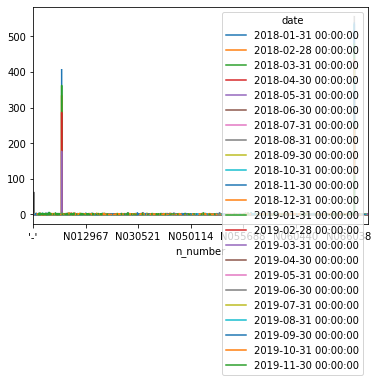

In [346]:
df_monthly['open'].unstack().plot()

TypeError: pie() missing 1 required positional argument: 'x'

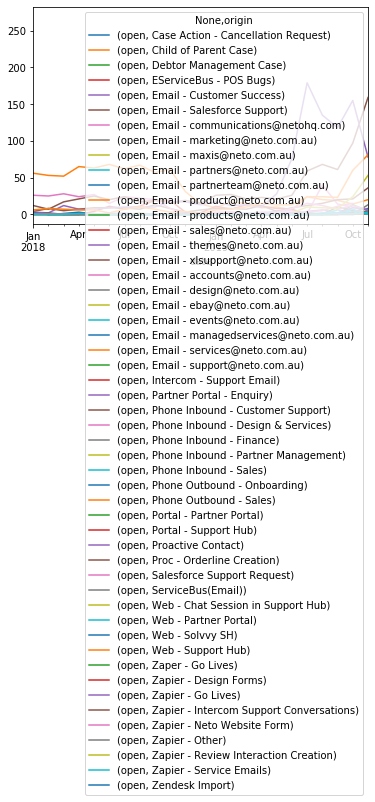

In [338]:
# plot data
#fig, ax = plt.subplots(figsize=(15,5))

# use unstack()
#plt.xticks(df_test2.index)

df_test2.loc[df_test2.open < 300].groupby(['date','origin'])[['open']].sum().unstack().plot().pie()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=.5)


In [392]:
df_aggregate = pd.DataFrame()
unique_n_numbers = df['Directory ID'].unique()
df_aggregate['n_number'] = unique_n_numbers

df['month'] = df['date'].map(lambda x: x.month)
df['year'] = df['date'].map(lambda x: x.year)

#df.set_index('date', inplace = True)

In [394]:
#df.Open.loc[(df['Directory ID'] == 'N001096')].resample('M').mean()

In [ ]:
unique_n_numbers = df['Directory ID'].unique()

In [389]:
unique_years = df.year.unique()

def create_blank_dataframe(unique_year_list):
    rows_list = []
    for n_number in unique_n_numbers:
        for year in unique_years:
            for month in range(1,12):
                dict1 = {
                    'n_number' : n_number,
                    'year' : year,
                    'month' : month,
                    'monthly_total' : 0,
                    'two_month_avg' : 0,
                    'three_month_avg' : 0
                }
                rows_list.append(dict1)
    return pd.DataFrame(rows_list, columns=['n_number', 'year','month', 'monthly_total', 'two_month_avg', 'three_month_avg'])

df_monthly_open = create_blank_dataframe(unique_years)
df_monthly_closed = create_blank_dataframe(unique_years)
df_monthly_age = create_blank_dataframe(unique_years)
df_monthly_origin = create_blank_dataframe(unique_years)

In [390]:
df_monthly_open

n_number  year  month  monthly_total  two_month_avg  \
0                   '-'  2018      1              0              0   
1                   '-'  2018      2              0              0   
2                   '-'  2018      3              0              0   
3                   '-'  2018      4              0              0   
4                   '-'  2018      5              0              0   
...                 ...   ...    ...            ...            ...   
140289  WAYNERENTBUY541  2019      7              0              0   
140290  WAYNERENTBUY541  2019      8              0              0   
140291  WAYNERENTBUY541  2019      9              0              0   
140292  WAYNERENTBUY541  2019     10              0              0   
140293  WAYNERENTBUY541  2019     11              0              0   

        three_month_avg  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
140289                0  
140290                0  
140291                0  
140292                0  
140293                0  

[140294 rows x 6 columns]

In [373]:
#df_monthly_open.n_number.unique()[100:200]

# Added a date field
df_monthly_open['date'] = pd.to_datetime(df_monthly_open.assign(day=1).loc[:, ['year','month','day']])


In [374]:
#df_monthly_open.iloc[1].date, df_monthly_open.iloc[1].date + relativedelta(months=-1)

In [375]:
#pd.to_datetime(df['date']).dt.date + relativedelta(months=1)

In [378]:
n_numbers = df_monthly_open.n_number.unique()[100:500]

#@timeit

for n_number in n_numbers:
    for year in [2019]:
        for month in [1]:
            monthly_total = df.Open.loc[(df['Directory ID'] == n_number) &
                                                 (df.year == year) &
                                                 (df.month == month)].sum()
            
            month_ago = df.Open.loc[(df['Directory ID'] == n_number) &
                                    (df['date'] == pd.to_datetime(df['date']).dt.date + relativedelta(months=-1))].sum()
            
            two_months_ago = df.Open.loc[(df['Directory ID'] == n_number) &
                                         (df['date'] == pd.to_datetime(df['date']).dt.date + relativedelta(months=-2))].sum()
            
            df_monthly_open['monthly_total'].loc[(df_monthly_open.n_number == n_number) &
                                                 (df_monthly_open.year == year) &
                                                 (df_monthly_open.month == month)] = monthly_total
            
            df_monthly_open['two_month_avg'].loc[(df_monthly_open.n_number == n_number) &
                                                 (df_monthly_open.year == year) &
                                                 (df_monthly_open.month == month)] = mean([monthly_total, month_ago])
            
            df_monthly_open['three_month_avg'].loc[(df_monthly_open.n_number == n_number) &
                                                   (df_monthly_open.year == year) &
                                                   (df_monthly_open.month == month)] = mean([monthly_total, month_ago, two_months_ago])
            
            
            
            

In [379]:
df_monthly_open.loc[df_monthly_open.monthly_total > 0]

n_number  year  month  monthly_total  two_month_avg  three_month_avg  \
2277   N001021  2019      1              1              0                0   
2431   N001030  2019      1              2              1                0   
3047   N001096  2019      1              1              0                0   
4411   N001462  2019      1              2              1                0   
4763   N001682  2019      1              1              0                0   
5907   N002627  2019      1              1              0                0   
6787   N004252  2019      1              2              1                0   
7029   N004413  2019      1              1              0                0   
7909   N005035  2019      1              1              0                0   
9493   N005871  2019      1              4              2                1   
10329  N006385  2019      1              1              0                0   
10791  N006629  2019      1              1              0                0   

            date  
2277  2019-01-01  
2431  2019-01-01  
3047  2019-01-01  
4411  2019-01-01  
4763  2019-01-01  
5907  2019-01-01  
6787  2019-01-01  
7029  2019-01-01  
7909  2019-01-01  
9493  2019-01-01  
10329 2019-01-01  
10791 2019-01-01

In [145]:
# All time stats

df_aggregate = pd.DataFrame()

df_aggregate['n_number'] = unique_n_numbers
df_aggregate['open'] = 0
df_aggregate['closed'] = 0

aggregate_fields = ['open', 'closed']

for n_number in unique_n_numbers:
    for aggregate_field in aggregate_fields:
        field_sum = df.Open.loc[(df['Directory ID'] == n_number)].sum()
        df_aggregate[aggregate_field].loc[df_aggregate['n_number'] == n_number] = field_sum